In [ ]:
pip install tensorflow==2.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 516.3 MB 3.5 kB/s 
     |████████████████████████████████| 3.0 MB 52.4 MB/s 
     |████████████████████████████████| 454 kB 66.5 MB/s 
     |████████████████████████████████| 2.9 MB 53.6 MB/s 
     |████████████████████████████████| 26.0 MB 1.3 MB/s 
     |████████████████████████████████| 152 kB 63.6 MB/s 
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.2.0
    Uninstalling cachetools-5.2.0:
      Successfully uninstalled cachetools-5.2.0
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.15.0
    Uninstalling google-auth-2.15.0:
      Successfully uninstalled google-auth-2.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Model
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
#from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
import numpy as np
from IPython.display import Image
from tensorflow.keras.optimizers import Adam

# Accessing My Google Drive
drive.mount('/content/drive')  # access my drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()
import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
#from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
target_size=(256,256) #provided by network resizing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Copy of Project',
    target_size=target_size,
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Copy of Project', # same directory as training data
    target_size=target_size,
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 560 images belonging to 7 classes.
Found 140 images belonging to 7 classes.


In [ ]:
train_generator.image_shape # bcheck 3la el shape

(256, 256, 3)

In [ ]:
train_generator.class_indices #bcheck 3la el classes el training

{'100pound': 0,
 '10pound': 1,
 '1pound': 2,
 '200pound': 3,
 '20pound': 4,
 '50pound': 5,
 '5pound': 6}

In [ ]:
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(256,256,3)),
   tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
     tf.keras.layers.Dense(7, activation='softmax')
])

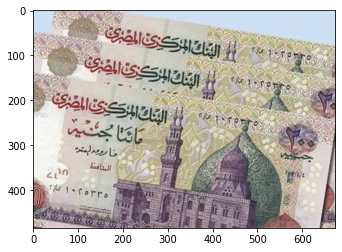

In [ ]:
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/Copy of Project/200pound/1542154_0.jpg')
plt.imshow(img1);
#preprocess image
img1 = image.load_img('/content/drive/MyDrive/Copy of Project/200pound/1542154_0.jpg', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
EPOCHS = 24
INIT_LR = 1e-3
BS = 32

In [ ]:

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

In [ ]:
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        #callbacks=[EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)],
        epochs=24,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/24
8/8 [==============================] - 239s 30s/step - loss: 0.4527 - accuracy: 0.2016 - val_loss: 0.4081 - val_accuracy: 0.1875
Epoch 2/24
8/8 [==============================] - 128s 16s/step - loss: 0.4000 - accuracy: 0.2157 - val_loss: 0.3970 - val_accuracy: 0.1953
Epoch 3/24
8/8 [==============================] - 123s 15s/step - loss: 0.3746 - accuracy: 0.2944 - val_loss: 0.3858 - val_accuracy: 0.3047
Epoch 4/24
8/8 [==============================] - 131s 16s/step - loss: 0.3560 - accuracy: 0.3569 - val_loss: 0.3462 - val_accuracy: 0.4766
Epoch 5/24
8/8 [==============================] - 121s 15s/step - loss: 0.3311 - accuracy: 0.4032 - val_loss: 0.3470 - val_accuracy: 0.4141
Epoch 6/24
8/8 [==============================] - 129s 16s/step - loss: 0.3192 - accuracy: 0.4657 - val_loss: 0.3415 - val_accuracy: 0.6094
Epoch 7/24
8/8 [==============================] - 127s 16s/step - loss: 0.2841 - accuracy: 0.5302 - val_loss: 0.3515 - val_accuracy: 0.3672
Epoch 8/24
8/8 [====

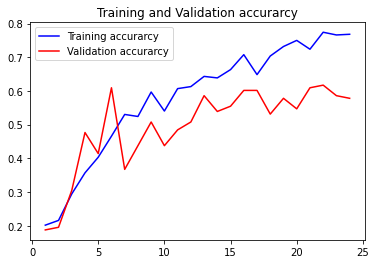

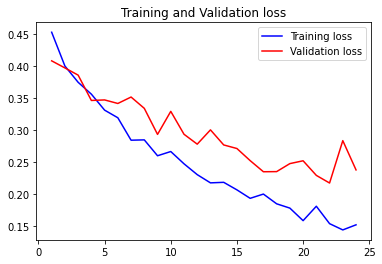

In [ ]:
import matplotlib
import matplotlib.pyplot as plt


accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Copy of Project.h5')

In [ ]:
model.save_weights('/content/drive/MyDrive/Copy of Project.h5')


In [ ]:
classes = train_generator.class_indices 
classes

{'100pound': 0,
 '10pound': 1,
 '1pound': 2,
 '200pound': 3,
 '20pound': 4,
 '50pound': 5,
 '5pound': 6}

In [ ]:
Classes = ["100pound","10pound","1pound","200pound","20pound","50pound","5pound"]


1pound


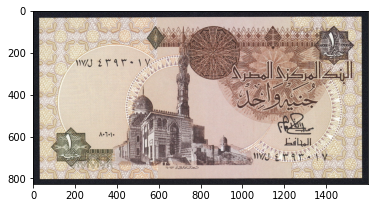

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
# Pre-Processing test data same as train data.
img_width=256
img_height=256


from tensorflow.keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/Copy of Project/1pound/1 Egyptian Pound Note 1978 (1).JPG')])
Animal=image.load_img('/content/drive/MyDrive/Copy of Project/1pound/1 Egyptian Pound Note 1978 (1).JPG')
plt.imshow(Animal)
print (Classes[int(result)])

200pound


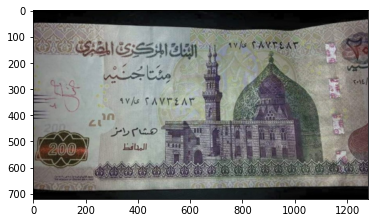

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
# Pre-Processing test data same as train data.
img_width=256
img_height=256


from tensorflow.keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/Copy of Project//200pound/200-جنيه-1280x720.jpg')])
Animal=image.load_img('/content/drive/MyDrive/Copy of Project//200pound/200-جنيه-1280x720.jpg')
plt.imshow(Animal)
print (Classes[int(result)])

10pound


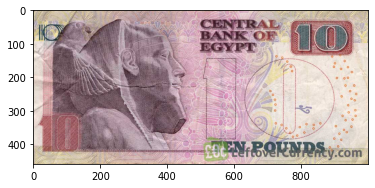

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
# Pre-Processing test data same as train data.
img_width=256
img_height=256


from tensorflow.keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/Copy of Project/10pound/10-egyptian-pounds-banknote-farao-statue-reverse-1.jpg')])
Animal=image.load_img('/content/drive/MyDrive/Copy of Project/10pound/10-egyptian-pounds-banknote-farao-statue-reverse-1.jpg')
plt.imshow(Animal)
print (Classes[int(result)])

100pound


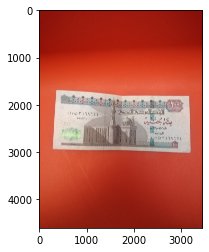

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
# Pre-Processing test data same as train data.
img_width=256
img_height=256


from tensorflow.keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/Copy of Project/100pound/IMG_20211228_224715.jpg')])
Animal=image.load_img('/content/drive/MyDrive/Copy of Project/100pound/IMG_20211228_224715.jpg')
plt.imshow(Animal)
print (Classes[int(result)])

20pound


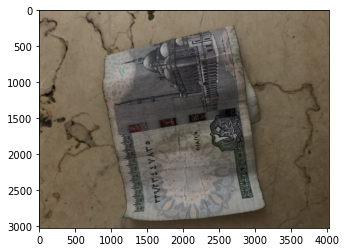

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
# Pre-Processing test data same as train data.
img_width=256
img_height=256


from tensorflow.keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/Copy of Project/20pound/2021_12_29_01_21_IMG_8898.JPG')])
Animal=image.load_img('/content/drive/MyDrive/Copy of Project/20pound/2021_12_29_01_21_IMG_8898.JPG')
plt.imshow(Animal)
print (Classes[int(result)])

50pound


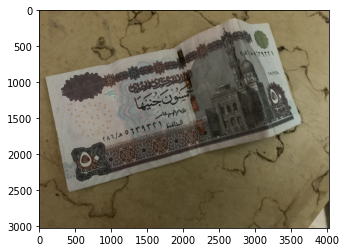

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
# Pre-Processing test data same as train data.
img_width=256
img_height=256


from tensorflow.keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/Copy of Project/50pound/2021_12_29_01_37_IMG_8987.JPG')])
Animal=image.load_img('/content/drive/MyDrive/Copy of Project/50pound/2021_12_29_01_37_IMG_8987.JPG')
plt.imshow(Animal)
print (Classes[int(result)])

5pound


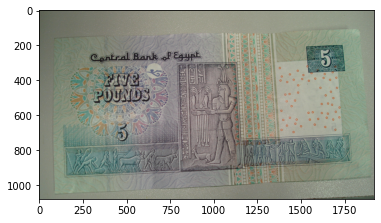

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
# Pre-Processing test data same as train data.
img_width=256
img_height=256


from tensorflow.keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/Copy of Project/5pound/5_EGP_back.jpg')])
Animal=image.load_img('/content/drive/MyDrive/Copy of Project/5pound/5_EGP_back.jpg')
plt.imshow(Animal)
print (Classes[int(result)])